In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")

import pickle
import time

import torch

import matplotlib.pyplot as plt
import defmod as dm
import defmod.multimodule_usefulfunctions as mm
#import model_graddesc as model

torch.set_default_tensor_type(torch.DoubleTensor)
dty = torch.float64

In [2]:
nb_pts1 = 7
nb_pts2 = 7
dim = 2

o1 = torch.tensor([0.,-1.])
o2 = torch.tensor([6.,3.])
origin = [o1,o2]
r1 = 2
r2 = 1
radius = [r1, r2]
nb_pts = [nb_pts1, nb_pts2]
circles = mm.multipleCircles(origin, radius, nb_pts)
source = circles[0]
target = circles[1]

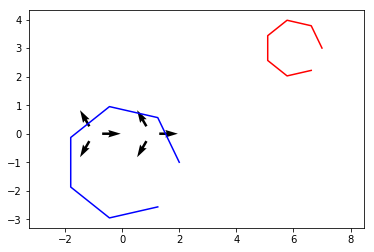

In [3]:
sigma_scaling = 1.
a = torch.sqrt(torch.tensor(3.))
direc_scaling_pts = torch.tensor([[1., 0.], [-0.5 , 0.5* a],  [-0.5, -0.5* a]], requires_grad=True, dtype=dty)
direc_scaling_vec =  torch.tensor([[1., 0.], [-0.5 , 0.5* a],  [-0.5, -0.5* a]], requires_grad=True, dtype=dty)
def f(x):
    centre = x.view(1,2).repeat(3,1)
    return centre + 0.3 * sigma_scaling * direc_scaling_pts

def g(x):
    return direc_scaling_vec
#%%
#gd0 = torch.tensor([[-1., 0.6]], requires_grad=True, dtype=dty)
gd0 = torch.tensor([[-1., 0.]], requires_grad=True, dtype=dty)
cotan0 = torch.tensor([[0., 0.]], requires_grad=True, dtype=dty)
#gd1 = torch.tensor([[0.8, 0.6]], requires_grad=True, dtype=dty)
gd1 = torch.tensor([[1., 0.]], requires_grad=True, dtype=dty)
cotan1 = torch.tensor([[0., 0.]], requires_grad=True, dtype=dty)
#%%
pts = f(gd0).detach().numpy()
vec = g(gd0).detach().numpy()
pts1 = f(gd1).detach().numpy()
vec1 = g(gd1).detach().numpy()


plt.quiver(pts[:,0], pts[:,1], vec[:,0], vec[:,1])
plt.quiver(pts1[:,0], pts1[:,1], vec1[:,0], vec1[:,1])
plt.plot(source.detach().numpy()[:,0], source.detach().numpy()[:,1], 'b')
plt.plot(target.detach().numpy()[:,0], target.detach().numpy()[:,1], 'r')
plt.axis('equal')
#%%
scaling0 = dm.deformationmodules.ConstrainedTranslations(dm.manifold.Landmarks(2, 1, gd = gd0.view(-1), cotan = cotan0.view(-1)), f, g, sigma_scaling)
scaling1 = dm.deformationmodules.ConstrainedTranslations(dm.manifold.Landmarks(2, 1, gd = gd1.view(-1), cotan = cotan1.view(-1)), f, g, sigma_scaling)


In [4]:
figsize = (10,10)
dpi=(50)
xmin = -4
xmax = 4
ymin = -4
ymax = 4
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=figsize, dpi=dpi)
plt.scatter(scal.f_support(gd)[:,0], scal.f_support(gd)[:,1])
plt.quiver(scal.f_support(gd)[:,0], scal.f_support(gd)[:,1], scal.f_vectors(gd)[:,0], scal.f_vectors(gd)[:,1])
plt.scatter(gd[:,0], gd[:,1], c='k')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.show()

def_grid = scal.field_generator()(gridpoints)
plt.figure(figsize=figsize, dpi=dpi)
plt.scatter(gd[:,0], gd[:,1], c='r')
plt.quiver(gridpoints.detach()[:,0], gridpoints.detach()[:,1], def_grid.detach()[:,0], def_grid.detach()[:,1],scale=5)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.show()


NameError: name 'scal' is not defined

<Figure size 500x500 with 0 Axes>